# Resale Transactions by Flat Type

The data-set is from the years 2006 to 2021. We will identify the most popular flat types based on resale transactions. We will identify the 80% of the bulk of flats to use for the next set of analysis.

### Import the necessary Libs

In [1]:
# Import all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

### Give the dataset a title

In [2]:
title = "Resale Transactions by Flat Type"
titlelen = len(title)
print("{:*^{titlelen}}".format(title, titlelen=titlelen+6))
print()

***Resale Transactions by Flat Type***



### Load the dataset

In [3]:
data = np.genfromtxt('ResaleTransactionsbyFlatTypebasedonregisteredcases.csv',  
                               skip_header=1, 
                               dtype=[('financial_year','i8'), ('flat_type','U50'),('resale_transactions','i8')], delimiter=",",
                               )

### Check the data and the head of the data

In [4]:
print(data)

[(2006, '1 room',    22) (2006, '2 room',   314) (2006, '3 room',  9230)
 (2006, '4 room', 10851) (2006, '5 room',  6314)
 (2006, 'Executive and Multi-generation',  2211) (2006, 'HUDC',    92)
 (2007, '1 room',    19) (2007, '2 room',   269) (2007, '3 room',  8368)
 (2007, '4 room', 10864) (2007, '5 room',  7447)
 (2007, 'Executive and Multi-generation',  2569) (2007, 'HUDC',    76)
 (2008, '1 room',    17) (2008, '2 room',   247) (2008, '3 room',  8295)
 (2008, '4 room', 10637) (2008, '5 room',  7253)
 (2008, 'Executive and Multi-generation',  2058) (2008, 'HUDC',    44)
 (2009, '1 room',    13) (2009, '2 room',   400) (2009, '3 room', 10854)
 (2009, '4 room', 14365) (2009, '5 room', 10369)
 (2009, 'Executive and Multi-generation',  3242) (2009, 'HUDC',    77)
 (2010, '1 room',    19) (2010, '2 room',   530) (2010, '3 room',  8940)
 (2010, '4 room', 10817) (2010, '5 room',  7274)
 (2010, 'Executive and Multi-generation',  2421) (2010, 'HUDC',    60)
 (2011, '1 room',    14) (2011, '2 

In [5]:
print(data[:10])

[(2006, '1 room',    22) (2006, '2 room',   314) (2006, '3 room',  9230)
 (2006, '4 room', 10851) (2006, '5 room',  6314)
 (2006, 'Executive and Multi-generation',  2211) (2006, 'HUDC',    92)
 (2007, '1 room',    19) (2007, '2 room',   269) (2007, '3 room',  8368)]


### Stats about the data

In [6]:
set_year = set(data['financial_year'])
set_flat = set(data['flat_type'])

print(str(len(set_year)) + " unique values in year column")
print(str(len(set_flat )) + " unique values in flat column")
print(set_year)
print(set_flat)

16 unique values in year column
7 unique values in flat column
{2016, 2017, 2018, 2019, 2020, 2021, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}
{'3 room', '4 room', '2 room', '5 room', 'HUDC', 'Executive and Multi-generation', '1 room'}


In [7]:
max_value = np.max(data['resale_transactions'])
min_value = np.min(data['resale_transactions'] )           
max_row_index = np.argmax(data['resale_transactions'])
min_row_index = np.argmin(data['resale_transactions'])
print("The maximum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data[max_row_index][0],data[max_row_index][1],data[max_row_index][2]))
print("The minimum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data[min_row_index][0],data[min_row_index][1],data[min_row_index][2]))

The maximum number of resale transaction was in the year 2009 for 4 room flats with 14365 units sold
The minimum number of resale transaction was in the year 2014 for HUDC flats with 1 units sold


### The boolean mask for the diffrent flat types

In [18]:
# Get of rows where flat_type is 1 room
flat_1room = np.where(data['flat_type'] == '1 room')[0]  
print(flat_1room)

# Get rows where flat_type is 2 room
flat_2room = np.where(data['flat_type'] == '2 room')[0] 
print(flat_2room)

# Get rows where flat_type is 3 room
flat_3room = np.where(data['flat_type'] == '3 room')[0] 
print(flat_3room)

# Get rows where flat_type is 4 room
flat_4room = np.where(data['flat_type'] == '4 room')[0] 
print(flat_4room)

# Get rows where flat_type is 5 room
flat_5room = np.where(data['flat_type'] == '5 room')[0] 
print(flat_5room)

# Get rows where flat_type is Executive and Multi-generation
flat_typeec = np.where(data['flat_type'] == 'Executive and Multi-generation')[0]
print(flat_typeec)

# Get rows where flat_type is HUDC
flat_typeHUDC = np.where(data['flat_type'] == 'HUDC')[0]
print(flat_typeHUDC)

[ 0  7 14 21 28 35 42 49 56 63 69 75 81 87 93 99]
[  1   8  15  22  29  36  43  50  57  64  70  76  82  88  94 100]
[  2   9  16  23  30  37  44  51  58  65  71  77  83  89  95 101]
[  3  10  17  24  31  38  45  52  59  66  72  78  84  90  96 102]
[  4  11  18  25  32  39  46  53  60  67  73  79  85  91  97 103]
[  5  12  19  26  33  40  47  54  61  68  74  80  86  92  98 104]
[ 6 13 20 27 34 41 48 55 62]


### Check the max and min of the respective flat types

In [21]:
# Filter data for 1 room flat type 
data_1 = data[flat_1room]  
print(data_1[:10])
max_value = np.max(data_1['resale_transactions'])
min_value = np.min(data_1['resale_transactions'] )           
max_row_index = np.argmax(data_1['resale_transactions'])
min_row_index = np.argmin(data_1['resale_transactions'])
print("The maximum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_1[max_row_index][0],data_1[max_row_index][1],data_1[max_row_index][2]))
print("The minimum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_1[min_row_index][0],data_1[min_row_index][1],data_1[min_row_index][2]))


# Filter data for 2 room flat type 
data_2 = data[flat_2room]  
print(data_2[:10])
max_value = np.max(data_2['resale_transactions'])
min_value = np.min(data_2['resale_transactions'] )           
max_row_index = np.argmax(data_2['resale_transactions'])
min_row_index = np.argmin(data_2['resale_transactions'])
print("The maximum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_2[max_row_index][0],data_2[max_row_index][1],data_2[max_row_index][2]))
print("The minimum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_2[min_row_index][0],data_2[min_row_index][1],data_2[min_row_index][2]))

# Filter data for 3 room flat type 
data_3 = data[flat_3room]  
print(data_3[:10])
max_value = np.max(data_3['resale_transactions'])
min_value = np.min(data_3['resale_transactions'] )           
max_row_index = np.argmax(data_3['resale_transactions'])
min_row_index = np.argmin(data_3['resale_transactions'])
print("The maximum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_3[max_row_index][0],data_3[max_row_index][1],data_3[max_row_index][2]))
print("The minimum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_3[min_row_index][0],data_3[min_row_index][1],data_3[min_row_index][2]))

# Filter data for 4 room flat type 
data_4 = data[flat_4room]  
print(data_4[:10])
max_value = np.max(data_4['resale_transactions'])
min_value = np.min(data_4['resale_transactions'] )           
max_row_index = np.argmax(data_4['resale_transactions'])
min_row_index = np.argmin(data_4['resale_transactions'])
print("The maximum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_4[max_row_index][0],data_4[max_row_index][1],data_4[max_row_index][2]))
print("The minimum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_4[min_row_index][0],data_4[min_row_index][1],data_4[min_row_index][2]))

# Filter data for 5 room flat type 
data_5 = data[flat_5room]  
print(data_5[:10])
max_value = np.max(data_5['resale_transactions'])
min_value = np.min(data_5['resale_transactions'] )           
max_row_index = np.argmax(data_5['resale_transactions'])
min_row_index = np.argmin(data_5['resale_transactions'])
print("The maximum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_5[max_row_index][0],data_5[max_row_index][1],data_5[max_row_index][2]))
print("The minimum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_5[min_row_index][0],data_5[min_row_index][1],data_5[min_row_index][2]))

# Filter data for  Executive and Multi-generation flat type 
data_ec = data[flat_typeec]  
print(data_ec[:10])
max_value = np.max(data_ec['resale_transactions'])
min_value = np.min(data_ec['resale_transactions'] )           
max_row_index = np.argmax(data_ec['resale_transactions'])
min_row_index = np.argmin(data_ec['resale_transactions'])
print("The maximum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_ec[max_row_index][0],data_ec[max_row_index][1],data_ec[max_row_index][2]))
print("The minimum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_ec[min_row_index][0],data_ec[min_row_index][1],data_ec[min_row_index][2]))

# Filter data for HUDC flat type 
data_hudc = data[flat_typeHUDC]  
print(data_hudc[:10])
max_value = np.max(data_hudc['resale_transactions'])
min_value = np.min(data_hudc['resale_transactions'] )           
max_row_index = np.argmax(data_hudc['resale_transactions'])
min_row_index = np.argmin(data_hudc['resale_transactions'])
print("The maximum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_hudc[max_row_index][0],data_hudc[max_row_index][1],data_hudc[max_row_index][2]))
print("The minimum number of resale transaction was in the year {} for {} flats with {:.0f} units sold".format(data_hudc[min_row_index][0],data_hudc[min_row_index][1],data_hudc[min_row_index][2]))


[(2006, '1 room', 22) (2007, '1 room', 19) (2008, '1 room', 17)
 (2009, '1 room', 13) (2010, '1 room', 19) (2011, '1 room', 14)
 (2012, '1 room', 15) (2013, '1 room', 10) (2014, '1 room', 19)
 (2015, '1 room',  9)]
The maximum number of resale transaction was in the year 2006 for 1 room flats with 22 units sold
The minimum number of resale transaction was in the year 2016 for 1 room flats with 7 units sold
[(2006, '2 room', 314) (2007, '2 room', 269) (2008, '2 room', 247)
 (2009, '2 room', 400) (2010, '2 room', 530) (2011, '2 room', 414)
 (2012, '2 room', 567) (2013, '2 room', 581) (2014, '2 room', 408)
 (2015, '2 room', 291)]
The maximum number of resale transaction was in the year 2013 for 2 room flats with 581 units sold
The minimum number of resale transaction was in the year 2008 for 2 room flats with 247 units sold
[(2006, '3 room',  9230) (2007, '3 room',  8368) (2008, '3 room',  8295)
 (2009, '3 room', 10854) (2010, '3 room',  8940) (2011, '3 room',  7230)
 (2012, '3 room',  67

From the data set we identify 3 room, 4 room, 5 room and Executive and Multi generation flats are the most popular flat types. Years to look into are 2009 and 2013. 

### Porportion for year 2009 & 2013 

Values: [13, 400, 10854, 14365, 10369, 3242, 77]
Total flats: 39320


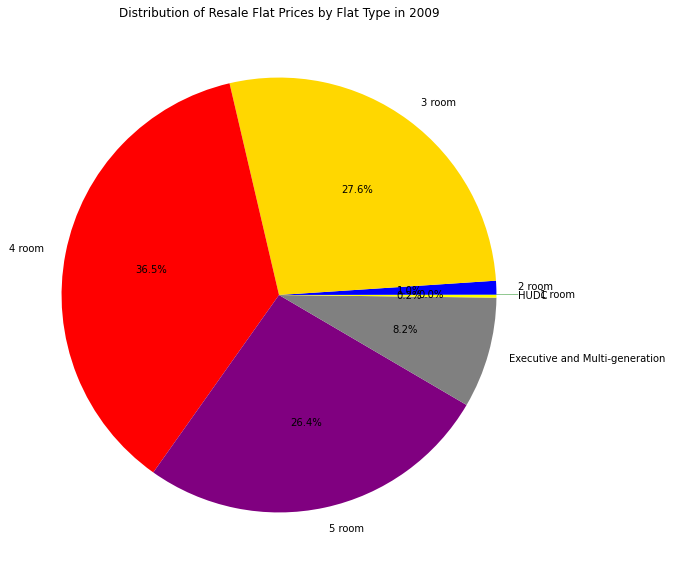

In [50]:
# Filter data for the year 2009
info_2009_final = data[data['financial_year'] == 2009]

# Aggregate resale transactions by flat type
unique_flat_types = np.unique(info_2009_final['flat_type'])
resale_transactions_aggregated = {flat_type: info_2009_final[info_2009_final['flat_type'] == flat_type]['resale_transactions'].sum() for flat_type in unique_flat_types}

#  Prepare data for the pie chart
labels_2009 = list(resale_transactions_aggregated.keys())
values_2009 = list(resale_transactions_aggregated.values())

print("Values:", values_2009)
print("Total flats:", sum(values_2009))

#  Pie chart settings
colors = ['green', 'blue', 'gold', 'red', 'purple', 'grey', 'yellow']
explode = [0.1 if i == 0 else 0 for i in range(len(labels_2009))]  # explode the first slice

# Plotting
plt.figure(1, figsize=(10, 10))
plt.title('Distribution of Resale Flat Prices by Flat Type in 2009')
plt.pie(values_2009, labels=labels_2009, colors=colors, autopct='%1.1f%%', explode=explode)
plt.show()

Values: [10, 581, 5553, 6560, 3549, 1293, 6]
Total flats 17552


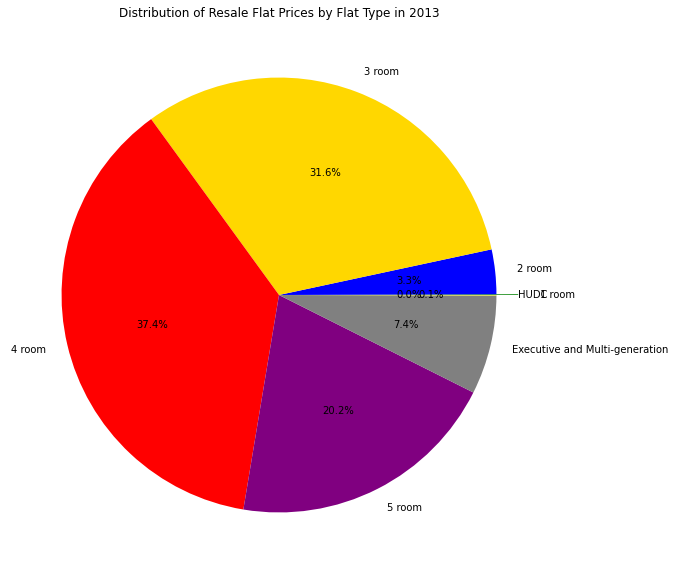

In [49]:
# Filter data for the year 2013
info_2013_final = data[data['financial_year'] == 2013]

# Aggregate resale transactions by flat type
unique_flat_types = np.unique(info_2013_final['flat_type'])
resale_transactions_aggregated = {flat_type: info_2013_final[info_2009_final['flat_type'] == flat_type]['resale_transactions'].sum() for flat_type in unique_flat_types}

# Prepare data for the pie chart
labels_2013 = list(resale_transactions_aggregated.keys())
values_2013 = list(resale_transactions_aggregated.values())

print("Values:", values_2013)
print("Total flats", sum(values_2013))

# Pie chart settings
colors = ['green', 'blue', 'gold', 'red', 'purple', 'grey', 'yellow']
explode = [0.1 if i == 0 else 0 for i in range(len(labels_2013))]  # explode the first slice

# Plotting
plt.figure(1, figsize=(10, 10))
plt.title('Distribution of Resale Flat Prices by Flat Type in 2013')
plt.pie(values_2013, labels=labels_2013, colors=colors, autopct='%1.1f%%', explode=explode)
plt.show()

### Proportion difference

In [61]:
x = (sum(values_2013)/sum(values_2009)) * 100
print(f"Total the difference is: {x:.1f}%")

Total the difference is: 44.6%


### 3 room Trend

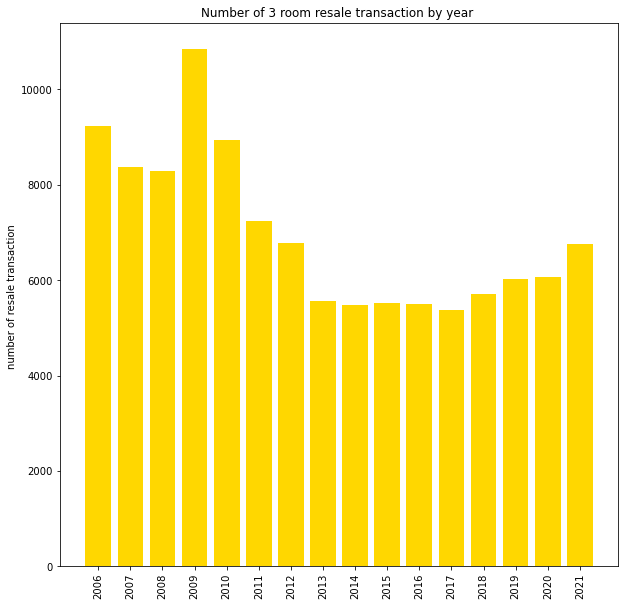

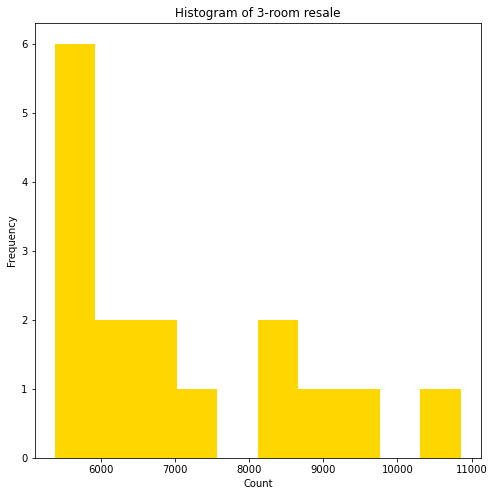

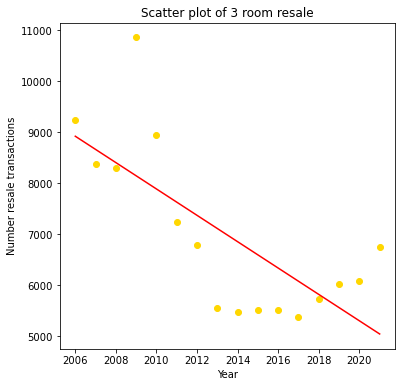

Pearson correlation coefficient: -0.7330068876519779


In [45]:
# Extract labels, years, and values for bar graph
labels = data_3['financial_year']
years = np.arange(len(labels))  
values = data_3['resale_transactions']
plt.figure(1, figsize=(10,10))
plt.bar(years, values, color='gold')
plt.title('Number of 3 room resale transaction by year ')
plt.ylabel('number of resale transaction ')
plt.xticks(years, labels, rotation='vertical')
plt.show()


#Histogram
plt.figure(figsize=(8,8))
plt.hist(data_3['resale_transactions'],color=['gold'])
plt.title("Histogram of 3-room resale")
plt.ylabel("Frequency")
plt.xlabel("Count")

plt.show()

#Scatterplot
x3 = data_3 ['financial_year']
y3 = data_3['resale_transactions']
m,b = np.polyfit(x3, y3, deg=1)

plt.figure(figsize=(6,6))
plt.scatter(x3,y3,c=['gold'])
plt.plot(x3, m*x3 + b, 'r-')
plt.title("Scatter plot of 3 room resale")
plt.xlabel('Year')
plt.ylabel('Number resale transactions')
plt.show()
pearson_corr = np.corrcoef(data_3['financial_year'], data_3['resale_transactions'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")

### 4 room Trend 

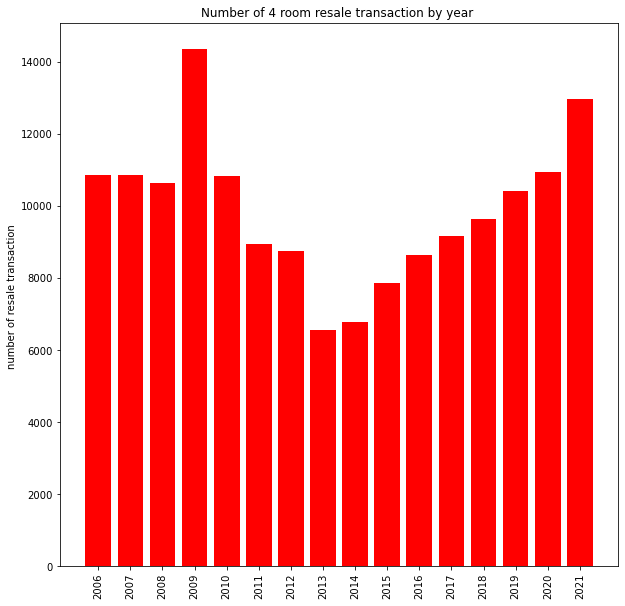

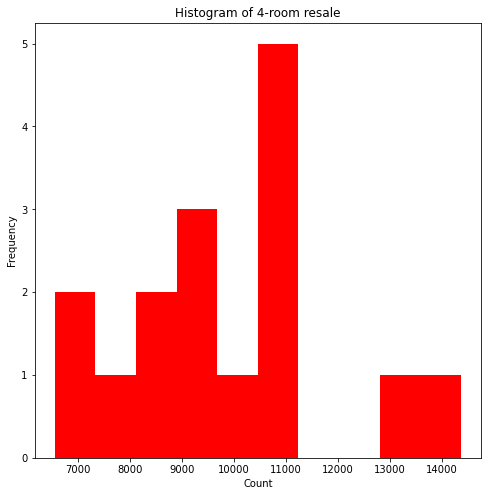

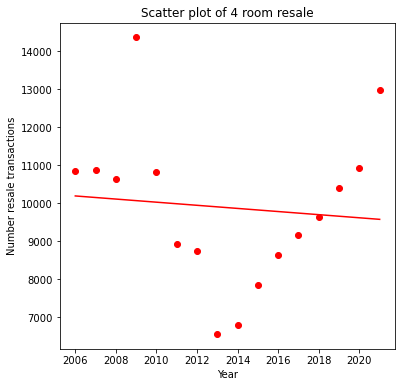

Pearson correlation coefficient: -0.09510566500782303


In [46]:
#for bar graph
labels = data_4['financial_year']
years = np.arange(len(labels))  # Create years based on number of labels
values = data_4['resale_transactions']
plt.figure(1, figsize=(10,10))
plt.bar(years, values, color='red')
plt.title('Number of 4 room resale transaction by year ')
plt.ylabel('number of resale transaction ')
plt.xticks(years, labels, rotation='vertical')
plt.show()


#Histogram
plt.figure(figsize=(8,8))
plt.hist(data_4['resale_transactions'],color=['red'])
plt.title("Histogram of 4-room resale")
plt.ylabel("Frequency")
plt.xlabel("Count")

plt.show()

#Scatterplot
x4 = data_4 ['financial_year']
y4 = data_4['resale_transactions']
m,b = np.polyfit(x4, y4, deg=1)

plt.figure(figsize=(6,6))
plt.scatter(x4,y4,c=['red'])
plt.plot(x4, m*x4 + b, 'r-')
plt.title("Scatter plot of 4 room resale")
plt.xlabel('Year')
plt.ylabel('Number resale transactions')
plt.show()
pearson_corr = np.corrcoef(data_4['financial_year'], data_4['resale_transactions'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")

### 5 room Trend

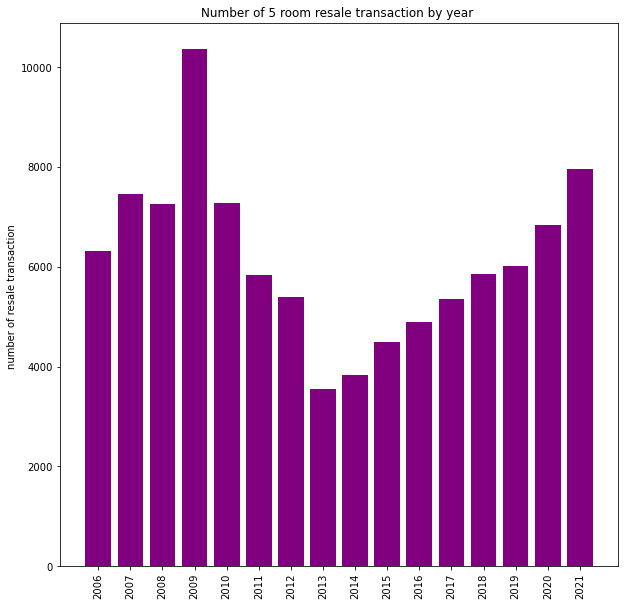

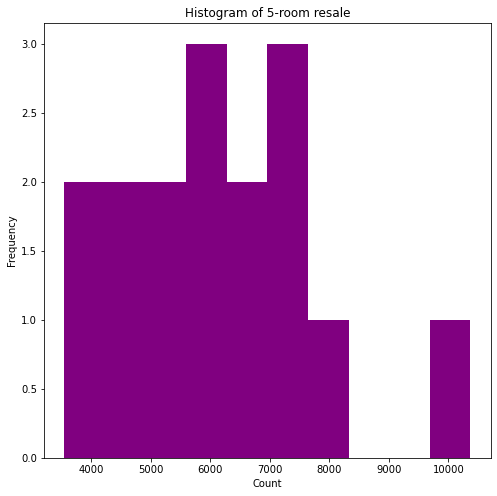

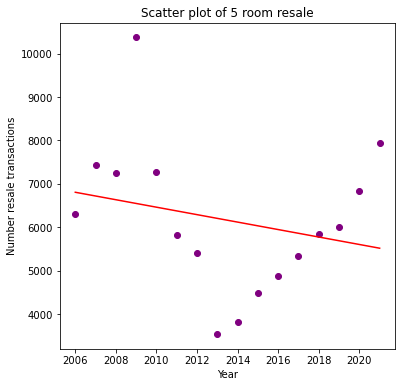

Pearson correlation coefficient: -0.23941881739594506


In [48]:
# Extract labels, years, and values for bar graph
labels = data_5['financial_year']
years = np.arange(len(labels))  
values = data_5['resale_transactions']
plt.figure(1, figsize=(10,10))
plt.bar(years, values, color='purple')
plt.title('Number of 5 room resale transaction by year ')
plt.ylabel('number of resale transaction ')
plt.xticks(years, labels, rotation='vertical')
plt.show()

#Histogram
plt.figure(figsize=(8,8))
plt.hist(data_5['resale_transactions'],color=['purple'])
plt.title("Histogram of 5-room resale")
plt.ylabel("Frequency")
plt.xlabel("Count")

plt.show()

#Scatterplot
x5 = data_5 ['financial_year']
y5 = data_5['resale_transactions']
m,b = np.polyfit(x5, y5, deg=1)

plt.figure(figsize=(6,6))
plt.scatter(x5,y5,c=['purple'])
plt.plot(x5, m*x5 + b, 'r-')
plt.title("Scatter plot of 5 room resale")
plt.xlabel('Year')
plt.ylabel('Number resale transactions')
plt.show()
pearson_corr = np.corrcoef(data_5['financial_year'], data_5['resale_transactions'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")